In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
type(breast_cancer_dataset)

sklearn.utils._bunch.Bunch

In [4]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
type(breast_cancer_dataset['data'])

numpy.ndarray

In [6]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [7]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [9]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [11]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [13]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [15]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [16]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [17]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


**`Im adding the code for the SVM optimization with both coarse and fine adjustment of hyperparameters C and Gamma.`**

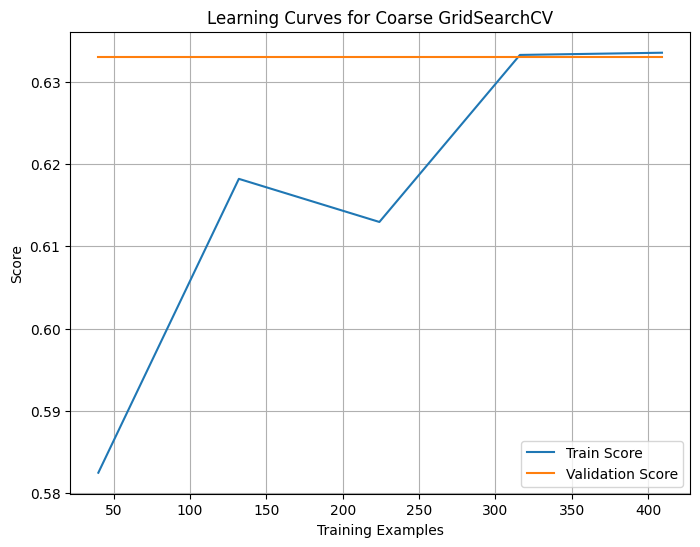

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test ready for training and testing.

# Define the SVM with the kernels
svm = SVC(kernel='rbf')

# Coarse grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_C_coarse = grid_search.best_params_['C']
best_gamma_coarse = grid_search.best_params_['gamma']

# Plot learning curves for the best model found during Coarse GridSearchCV
svm_best_coarse = SVC(kernel='rbf', C=best_C_coarse, gamma=best_gamma_coarse)
train_sizes, train_scores, test_scores = learning_curve(svm_best_coarse, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves for Coarse GridSearchCV')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Define the SVM with the kernels
#imchoosing rbf coz i heart rbf
svm = SVC(kernel='rbf')

# Fine grid of hyperparameters centered around the coarse optimal values
# okoman logspace function tu sua. (here) it creates a range of values between 10^(log(best gamma)-1) to 10^(log(best gamma)+1). The 10 there represents the number of points between the two limits.
param_grid_fine = {
    'C': np.logspace(np.log10(best_C_coarse) - 1, np.log10(best_C_coarse) + 1, 10),
    'gamma': np.logspace(np.log10(best_gamma_coarse) - 1, np.log10(best_gamma_coarse) + 1, 10)
}

# Perform GridSearchCV with the finer grid
grid_search_fine = GridSearchCV(svm, param_grid_fine, cv=5, n_jobs=-1)
grid_search_fine.fit(X_train, Y_train)

# Get the best hyperparameters
best_C_fine = grid_search_fine.best_params_['C']
best_gamma_fine = grid_search_fine.best_params_['gamma']



Best Model - Hyperparameters:
C: 0.2442053094548651, Gamma: 0.001
Accuracy: 0.9363 +/- 0.0254


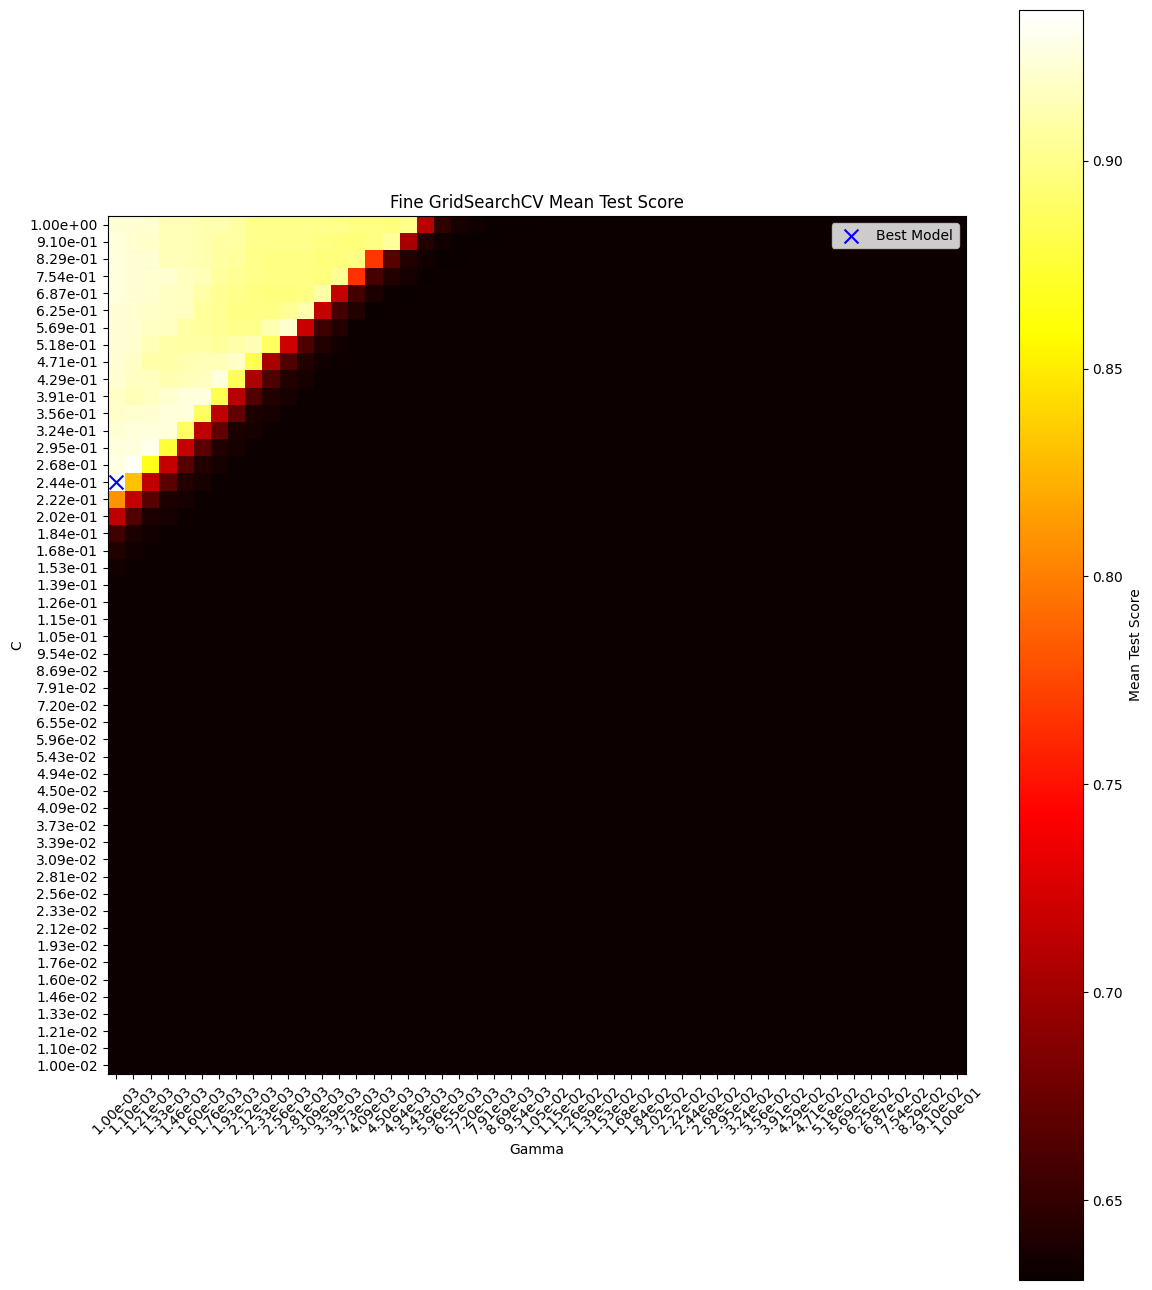

In [27]:
# Get the best hyperparameters and its performance
best_C_fine = grid_search_fine.best_params_['C']
best_gamma_fine = grid_search_fine.best_params_['gamma']
best_score_fine = grid_search_fine.best_score_
std_best_score_fine = grid_search_fine.cv_results_['std_test_score'][grid_search_fine.best_index_]

# Plot the heatmap for the fine grid
C_values = np.logspace(np.log10(best_C_coarse) - 1, np.log10(best_C_coarse) + 1, 50)
gamma_values = np.logspace(np.log10(best_gamma_coarse) - 1, np.log10(best_gamma_coarse) + 1, 50)
C_grid, gamma_grid = np.meshgrid(C_values, gamma_values)
scores_fine = np.array(grid_search_fine.cv_results_['mean_test_score']).reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(12, 13))
plt.imshow(scores_fine, interpolation='nearest', cmap='hot', origin='lower')
plt.colorbar(label='Mean Test Score')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_values)), [f'{gamma:.2e}' for gamma in gamma_values], rotation=45)
plt.yticks(np.arange(len(C_values)), [f'{C:.2e}' for C in C_values])
plt.title('Fine GridSearchCV Mean Test Score')

# Annotate the best model's point
best_model_index = np.unravel_index(np.argmax(scores_fine), scores_fine.shape)
plt.scatter(best_model_index[1], best_model_index[0], marker='x', color='blue', s=100, label='Best Model')
plt.legend()
plt.tight_layout()

# Print the hyperparameters and performance of the best model
print(f'Best Model - Hyperparameters:')
print(f'C: {best_C_fine}, Gamma: {best_gamma_fine}')
print(f'Accuracy: {best_score_fine:.4f} +/- {std_best_score_fine:.4f}')

plt.show()

Model Training

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# training the DT model using Training data

model.fit(X_train, Y_train)

DecisionTreeClassifier()

Model Evaluation

Accuracy score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9385964912280702


Building a Predictive System

In [ ]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')


[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


via SVM

In [ ]:
from sklearn.svm import SVC
svm_Class = SVC()
svm_Class.fit(X_train, Y_train)

SVC()

In [ ]:
# accuracy on training data
X_train_prediction2 = model.predict(X_train)
training_data_accuracy2 = accuracy_score(Y_train, X_train_prediction2)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy2)

Accuracy on training data =  1.0


In [ ]:
# accuracy on test data
X_test_prediction2 = svm_Class.predict(X_test)
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction2)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy2)

Accuracy on test data =  0.9035087719298246


kernal use

In [ ]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
A = breast_cancer_dataset.data
B = breast_cancer_dataset.target

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=123)

In [ ]:
# Train the SVM model with RBF kernel
model2 = SVC(kernel='rbf')
model2.fit(A_train, B_train)

SVC()

In [ ]:
pred = model2.predict(A_test)
accuracy = accuracy_score(B_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [ ]:
# Train the SVM model with poly kernel
model3 = SVC(kernel='poly')
model3.fit(A_train, B_train)

SVC(kernel='poly')

In [ ]:
pred2 = model3.predict(A_test)
accuracy = accuracy_score(B_test, pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model4 = SVC(kernel='poly')
scores = cross_val_score(model4, A, B, cv=10)

In [ ]:
print("Accuracy for each fold:", scores)

Accuracy for each fold: [0.87719298 0.80701754 0.87719298 0.9122807  0.92982456 0.92982456
 0.94736842 0.94736842 0.92982456 0.92857143]


In [ ]:
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.9086466165413534
Standard deviation: 0.04130569894484085


In [ ]:
model5 = SVC(kernel='rbf')
scores2 = cross_val_score(model5, A, B, cv=10)

In [ ]:
print("Mean accuracy:", scores2.mean())
print("Standard deviation:", scores2.std())

Mean accuracy: 0.9138784461152882
Standard deviation: 0.02878745403168186


gridsearch cv

In [ ]:
kernels = ['rbf', 'linear', 'poly']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
  for cval in C:
    cv_scores = cross_val_score(svm.SVC(kernel=kval, C = cval, gamma='auto'),breast_cancer_dataset.data,breast_cancer_dataset.target, cv = 5)
    avg_scores[kval + '_'+ str(cval)] = np.average(cv_scores)

avg_scores

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(A,B)
clf.cv_results_

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

best model selection

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df